# <span style='font-family:"Times New Roman"'> <span styel=''> Business Analytics and Data Science: Final Assignment

    

### <span style='font-family:"Times New Roman"'> <span styel=''>Student: #####
### <span style='font-family:"Times New Roman"'> Sofia #####
### <span style='font-family:"Times New Roman"'> sofia#####@s#####.de

## <span style='font-family:"Times New Roman"'> <span styel=''> I. Introduction
  <span style='font-family:"Times New Roman"'> <span styel=''>Pat Gelsinger once said: "Data is the new science. Big Data holds the answers".(Jeevan, 2021) Being able to manipulate the data, building predictive analytics models can let entrepreneurs affect the competitiveness of the company on the market, and the effectiveness of the company's performance. In this assignment, we were given the task to create a model to understand which items are likely to be returned. This information can optimize the revenue of the company. 
   
 <span style='font-family:"Times New Roman"'> <span styel=''>**The Jupyter notebook will consist of several steps: exploratory data analysis, data preparation, model tuning and selection, model evaluation, and conclusions.** Also, in this work, several scientific papers and books were used. The whole list will be presented in the section "References" at the end of this notebook.
 

## <span style='font-family:"Times New Roman"'> <span styel=''>II. Exploratory data analysis
<span style='font-family:"Times New Roman"'> <span styel=''>EDA is an approach to data analysis that postpones the usual assumptions about what kind of model the data follow with the more direct approach of allowing the data itself to reveal its underlying structure and model. (Ben-Zvi, Garfield and Ben-Zvi, 2004)
After the data was received and before data manipulation, it is necessary to analyze the data, to find out what storage capacity is being used, what the data structure and variables are. First of all, we will copy the necessary libraries and will prepare the basis for future plots.

In [1]:
pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.8/site-packages (0.24.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from pprint import pprint
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
np.random.seed(888)
np.set_printoptions(suppress=True)

%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)

import os
file = 'BADS_WS2021_known.csv'
df = pd.read_csv(file)
print(os.getcwd())
file_unknown = 'BADS_WS2021_unknown.csv'
data_unknown=pd.read_csv(file_unknown)

/Users/sofyakonchakova/Desktop/Jupyter notebooks for tutorials and execises-20210402


<span style='font-family:"Times New Roman"'> <span styel=''>The data base was succesfully uploaded. Further steps will be dedicated to the data structure analysis, which includes checking the data classes of the variables, finding out if there are any outliers or missing values. These basic steps are necessary for  researchers to get the understanding of further actions during the data preparation steps. *EDA* is known for capturing and analyzing uncommon data patterns that will be skipped by typical machine learning algorithms. (Why EDA is Crucial for Any Data Science Project? AISmartz, 2019) Also, it is commonly associated with visualization.

In [4]:
print('Dimensionality of the data is {}'.format(df.shape))  
print('The data set has {} cases.'.format(df.shape[0]))     
print('The total number of elements is {}.'.format(df.size))
df.info()

Dimensionality of the data is (100000, 14)
The data set has 100000 cases.
The total number of elements is 1400000.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_item_id  100000 non-null  int64  
 1   order_date     100000 non-null  object 
 2   delivery_date  90682 non-null   object 
 3   item_id        100000 non-null  int64  
 4   item_size      100000 non-null  object 
 5   item_color     100000 non-null  object 
 6   brand_id       100000 non-null  int64  
 7   item_price     100000 non-null  float64
 8   user_id        100000 non-null  int64  
 9   user_title     100000 non-null  object 
 10  user_dob       91275 non-null   object 
 11  user_state     100000 non-null  object 
 12  user_reg_date  100000 non-null  object 
 13  return         100000 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 1

<span style='font-family:"Times New Roman"'> <span styel=''>This data set consists of 14 variables: 13 of them are independent. The variable "return" is a dependent variable. Big amoint of variables consist of character values. The approach to interpreting this variables will be observed later. The data set has quite a big size (10.7+ MB). Before moving forward, it is necessary to seize the size of the data set. For it it is crucial to understand what these variables mean and what approach the researcher should use to manipulate them. Several variables with type "object" can be treated as categories and date variables (user_reg_date, user_dob) will be considered as datetime64 values.

In [5]:
df['order_item_id'] = df['order_item_id'].astype(np.int32)
df['item_id'] = df['item_id'].astype(np.int32)
df['user_id'] = df['user_id'].astype(np.int32)
df['item_size'] = df['item_size'].astype('category')
df['item_color'] = df['item_color'].astype('category')
df['brand_id'] = df['brand_id'].astype(np.int32)
df['item_price'] = df['item_price'].astype(np.float16)
df['user_title']=df['user_title'].astype('category')
df['user_state']=df['user_state'].astype('category')
df['user_dob']=df['user_dob'].astype(np.datetime64)
df['user_reg_date']=df['user_reg_date'].astype(np.datetime64)
df['return']=df['return'].astype(np.int16)


data_unknown['order_item_id'] = data_unknown['order_item_id'].astype(np.int32)
data_unknown['item_id'] = data_unknown['item_id'].astype(np.int32)
data_unknown['user_id'] = data_unknown['user_id'].astype(np.int32)
data_unknown['item_size'] = data_unknown['item_size'].astype('category')
data_unknown['item_color'] = data_unknown['item_color'].astype('category')
data_unknown['brand_id'] = data_unknown['brand_id'].astype(np.int32)
data_unknown['item_price'] = data_unknown['item_price'].astype(np.float16)
data_unknown['user_title']=data_unknown['user_title'].astype('category')
data_unknown['user_state']=data_unknown['user_state'].astype('category')
data_unknown['user_dob']=data_unknown['user_dob'].astype(np.datetime64)
data_unknown['user_reg_date']=data_unknown['user_reg_date'].astype(np.datetime64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_item_id  100000 non-null  int32         
 1   order_date     100000 non-null  object        
 2   delivery_date  90682 non-null   object        
 3   item_id        100000 non-null  int32         
 4   item_size      100000 non-null  category      
 5   item_color     100000 non-null  category      
 6   brand_id       100000 non-null  int32         
 7   item_price     100000 non-null  float16       
 8   user_id        100000 non-null  int32         
 9   user_title     100000 non-null  category      
 10  user_dob       91275 non-null   datetime64[ns]
 11  user_state     100000 non-null  category      
 12  user_reg_date  100000 non-null  datetime64[ns]
 13  return         100000 non-null  int16         
dtypes: category(4), datetime64[ns](2), float16(1), int16(

<span style='font-family:"Times New Roman"'> <span styel=''>The storage capacity of data seized to 5.7 MB. For now it is enough to continue with data exploration. Let's visualise data using graphic approach.

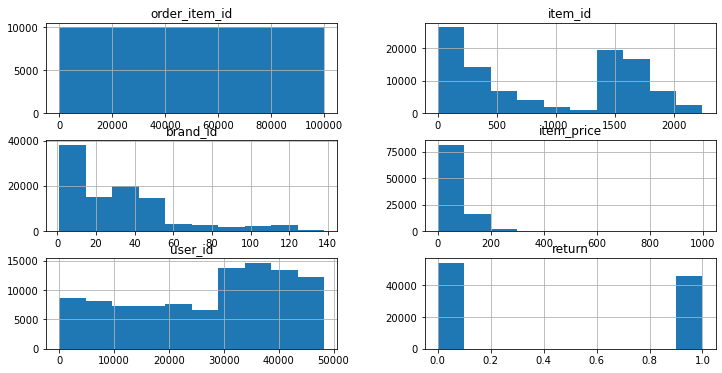

In [6]:
df.hist();

<span style='font-family:"Times New Roman"'> <span styel=''>It is the most basic approach for data visualizatioan and it has several obvious disadvantages. From the histograms above, it is difficult to understand anything - neither distribution, nor if there are outliers in the data set. Also, there are no information about values that can cause under- or over- fitting the model. For this, categorical variables will be analyzed.

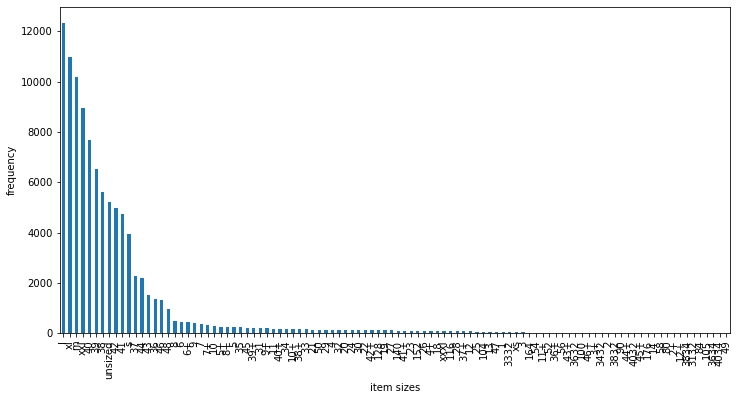

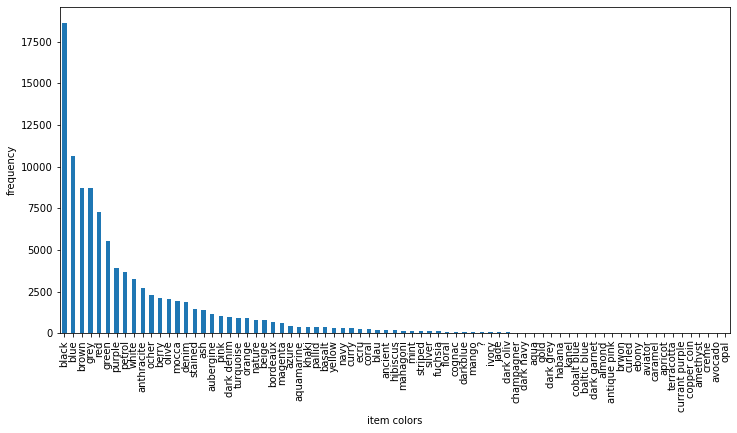

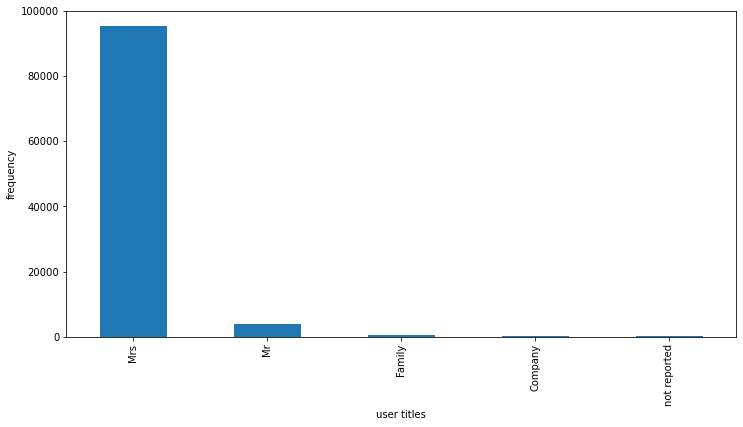

In [7]:
df['item_size'].value_counts().plot(kind='bar')
plt.xlabel("item sizes")
plt.ylabel("frequency")
plt.show()
df['item_color'].value_counts().plot(kind='bar')
plt.xlabel("item colors")
plt.ylabel("frequency")
plt.show()
df['user_title'].value_counts().plot(kind='bar')
plt.xlabel("user titles")
plt.ylabel("frequency")
plt.show()

<span style='font-family:"Times New Roman"'> <span styel=''>The created graphs show us distribution of categorical variables. What can be noticed:

<span style='font-family:"Times New Roman"'> <span styel=''> 1. Variable "item_sizes" has many levels (e.g. 23, XXL, unisized). Obviously, the online shop does not sell items that have the equal table of size. However, this can influence our model by causing its underfitting when it will come to the training data. This problem will be solved during the data preparation step.
        
<span style='font-family:"Times New Roman"'> <span styel=''> 2. The same situation we have with the variable "item_color". Probably, it is possible to simplify it by grouping colors during the data preparation step (e.g. grey = ash color).

<span style='font-family:"Times New Roman"'> <span styel=''> 3. Most customers are Mrs. That is all.


<span style='font-family:"Times New Roman"'> <span styel=''> What else can influence customers' decisions towards return of the item? That also can be prices. The next steps will be connected with analysis of the variable "item_price" and its distribution. 

In [8]:
df_sorted = df.sort_values(by=['item_price'])
df_sorted['item_price'] = pd.to_numeric(df['item_price'])
df_sorted['item_price']

57967      0.0
11287      0.0
11286      0.0
11217      0.0
58680      0.0
         ...  
66906    400.0
49210    999.0
65019    999.0
70148    999.0
48479    999.0
Name: item_price, Length: 100000, dtype: float16

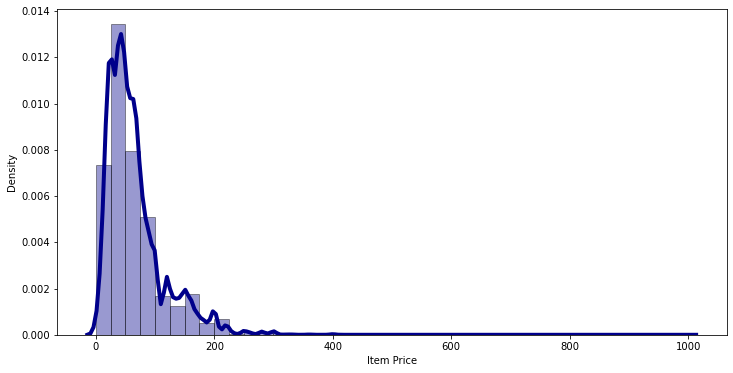

In [9]:
a = sns.distplot(df_sorted['item_price'], hist=True, kde=True, 
             bins=int(200/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
a.tick_params(labelsize=10)
plt.ylabel('Density',fontsize=10)
plt.xlabel ('Item Price',fontsize=10)
plt.show()

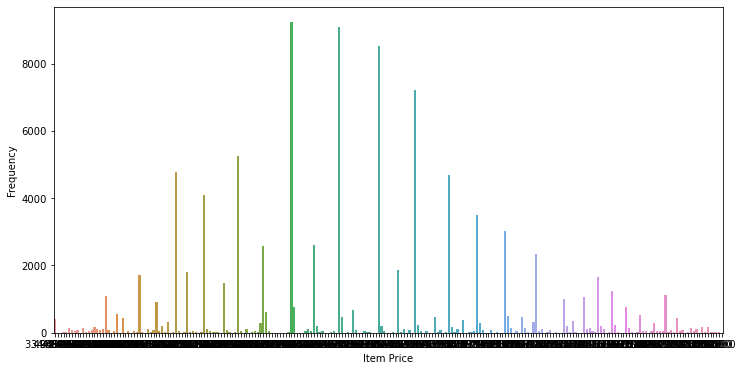

In [10]:
b=sns.barplot(x=df.item_price.value_counts().index, y=df.item_price.value_counts(), orient = 'v')
b.tick_params(labelsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.xlabel ('Item Price',fontsize=10)
plt.show()

<span style='font-family:"Times New Roman"'> <span styel=''>Variable "item_price" can be called normally distributed. Still, we can observe that it is slightly skewed to the left. It is necessary to check outliers and to modify them.
The next step will be checking if there are any missing values in the data set.


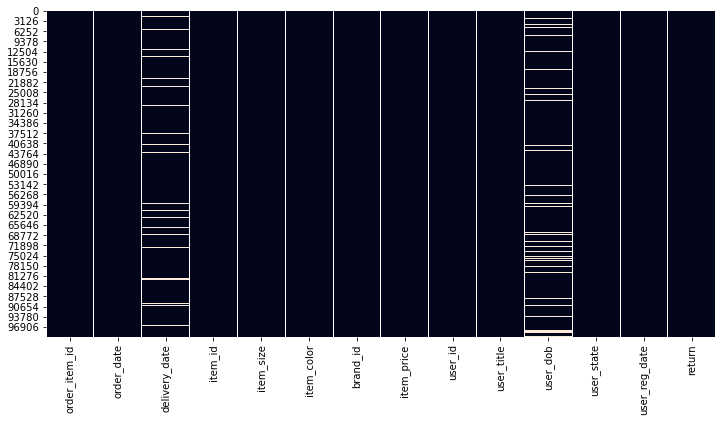

In [11]:
df.isnull().sum().sum()
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False);

In [12]:
df.isnull().sum().sum()

18043

<span style='font-family:"Times New Roman"'> <span styel=''>Variables "delivery_date" and "user_dob" contain missing values. The total sum of missing values are 18043. It is important to choose a right approach towards missing values whether it is better to delete or replace them by mean values or by introducing dummy variable. 

## <span style='font-family:"Times New Roman"'> <span styel=''> III. Data preparation

<span style='font-family:"Times New Roman"'> <span styel=''>Data are collected for many purposes, not necessarily with machine learning or data mining in mind.  Consequently, there is often a need to identify and extract relevant data for the given analytic purpose.  Every learning system has specific requirements about how data must be presented for analysis and hence data must be transformed to fulfill those requirements.  Further, the selection of the specific data to be analyzed can greatly affect the models that are learned.  For these reasons, data preparation is a critical part of any machine learning exercise, and is often the most time-consuming part of any non-trivial machine learning or data mining project.(Abdallah and Webb, 2017)

<span style='font-family:"Times New Roman"'> <span styel=''>The data preparation will be performed for this data set. It includes several steps, such as data cleansing, data structuring, data transformation, data splitting and etc. The main goal is to prepare data for future usage and analysis. It should not be difficult to perform data analysis on the beforehand prepared data set. First steps consist of eliminating missing values and outliers, structuring the data to prevent underfitting of the future model

<span style='font-family:"Times New Roman"'> <span styel=''>Starting with the variable "user_dob", it is possible to count the mode value and replace missing values with it.

In [13]:
df.user_dob.mode()[0]
df.user_dob[df.user_dob.isnull() ] = df.user_dob.mode()[0] 
df.user_dob.head()
if df.user_dob.isnull().any() == False and df.user_dob.isnull().any() == False:
    print('nothing else left')
else:
    print('bunch of work ahead')
df.user_dob


data_unknown.user_dob.mode()[0]
data_unknown.user_dob[data_unknown.user_dob.isnull() ] = data_unknown.user_dob.mode()[0]  
data_unknown.user_dob.head()
if data_unknown.user_dob.isnull().any() == False and data_unknown.user_dob.isnull().any() == False:
    print('nothing else left')
else:
    print('bunch of work ahead')
data_unknown.user_dob

nothing else left
nothing else left


0       1967-09-18
1       1967-09-18
2       1967-09-18
3       1967-09-18
4       1967-09-18
           ...    
49995   1900-11-21
49996   1900-11-21
49997   1900-11-21
49998   1900-11-21
49999   1967-10-26
Name: user_dob, Length: 50000, dtype: datetime64[ns]

In [14]:
import datetime
df['user_dob'] = pd.to_datetime(df.user_dob)
 
data_unknown['user_dob'] = pd.to_datetime(data_unknown.user_dob)

In [15]:
born_df = df.user_dob
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
user_age_df = df['user_dob'].apply(lambda x: from_dob_to_age(x))


#the same for the unknown data 
born_data_unknown = data_unknown.user_dob
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
user_age_data_unknown = data_unknown['user_dob'].apply(lambda x: from_dob_to_age(x))


print (user_age_df)

0        52
1        52
2        51
3        51
4        51
         ..
99995    62
99996    62
99997    36
99998    36
99999    47
Name: user_dob, Length: 100000, dtype: int64


In [16]:
df['user_age']=user_age_df
df = df.drop('user_dob', axis = 1)

data_unknown['user_age']=user_age_data_unknown
data_unknown = data_unknown.drop('user_dob', axis = 1)

<span style='font-family:"Times New Roman"'> <span styel=''>To eliminate missing values in the data set in the variable "user_dob" simple approach was used. First of all, mode value was counted and missing values were replaced with it. Then, for better understanding, new variable "user_age" was introduced. Customers of 47 and 50 will not have a big difference for our model. Let's create age ranges instead. But first, outliers.

In [17]:
df.user_age.describe()

count    100000.000000
mean         62.109240
std          20.913807
min           9.000000
25%          51.000000
50%          57.000000
75%          64.000000
max         120.000000
Name: user_age, dtype: float64

<span style='font-family:"Times New Roman"'> <span styel=''>According to Google, a theoretical study suggested the maximum human lifespan to be around 125 years using a modified stretched exponential function for human survival curves. Theoretically, the customer at the age of 120 has 5 years more to enjoy buying items from this particular online shop. Though, it is doubtful and it is better to treat such values as outliers.

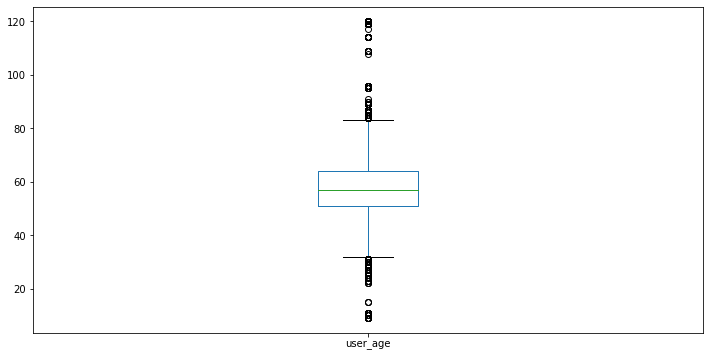

In [18]:
num_vars = df.select_dtypes(include="int64")
half = np.ceil(num_vars.shape[1] / 2).astype(int)  # for cosmetic reasons we split the plots into two rows
num_vars.iloc[:, 0:half].plot(kind = 'box', subplots=True);


<span style='font-family:"Times New Roman"'> <span styel=''>Definitely, variable "user_age" has bunch of outliers. The approach from the tutorial will be used.

In [19]:
def outlier_truncation(x, factor=1.5):
  
    x_new = x.copy()
    
    IQR = x.quantile(0.75) - x.quantile(0.25) 
    
    upper = x.quantile(0.75) + factor*IQR
    lower = x.quantile(0.25) - factor*IQR
    
    x_new[x < lower] = lower
    x_new[x > upper] = upper
    
    return x_new
num_cols_df = [x for x in df.columns if df[x].dtype == 'int64' ]  
df[num_cols_df] = df[num_cols_df].apply(outlier_truncation, axis=0, args=(3,))  


num_cols_data_unknown = [x for x in data_unknown.columns if data_unknown[x].dtype == 'int64' ]  
data_unknown[num_cols_data_unknown] = data_unknown[num_cols_data_unknown].apply(outlier_truncation, axis=0, args=(3,))  

<span style='font-family:"Times New Roman"'> <span styel=''> The maximum value of the variable "user_age" has been successfully changed. Another approach to treat this variable is to create age bins. In marketing while defining target group, age ranges are used. It can be the case.

In [20]:
df['age_bins'] = pd.cut(x=df['user_age'], bins=[10,20,21,30,31,40,41,50,51,63,64,104])
data_unknown['age_bins'] = pd.cut(x=data_unknown['user_age'], bins=[10,20,21,30,31,40,41,50,51,63,64,104])

print(df.age_bins.head())

0    (51, 63]
1    (51, 63]
2    (50, 51]
3    (50, 51]
4    (50, 51]
Name: age_bins, dtype: category
Categories (11, interval[int64]): [(10, 20] < (20, 21] < (21, 30] < (30, 31] ... (50, 51] < (51, 63] < (63, 64] < (64, 104]]


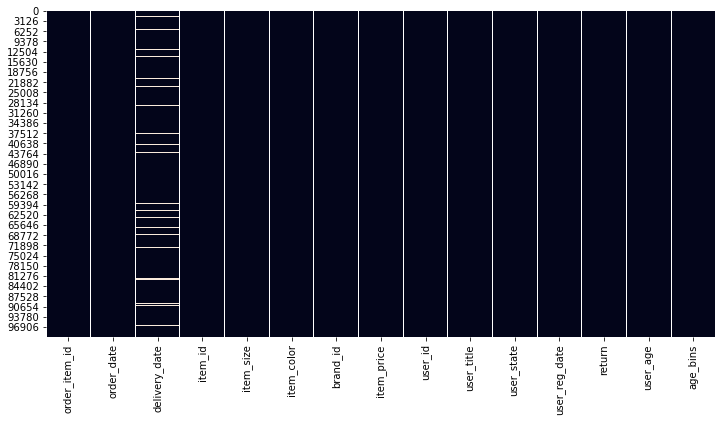

In [21]:
df.isnull().sum().sum()
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False);

<span style='font-family:"Times New Roman"'> <span styel=''>For this moment, variable "user_age" no longer has missing values. Still, missing values are still exist in the variable 'delivery_date'. If the order was not delivered, no surprise that it was returned. The missing values will be treated by replacing with mode value of the variable. Then, the days spent on delivery will be counted. It can be supposed that longer delivery - higher chance of return of the item.

In [22]:
df['order_date'] = df['order_date'].astype(np.datetime64)
df['delivery_date'] = df['delivery_date'].astype(np.datetime64)

data_unknown['order_date'] = data_unknown['order_date'].astype(np.datetime64)
data_unknown['delivery_date'] = data_unknown['delivery_date'].astype(np.datetime64)

In [23]:
df.delivery_date[df.delivery_date.isnull() ] = df.delivery_date.mode()[0]

data_unknown.delivery_date[data_unknown.delivery_date.isnull() ] = data_unknown.delivery_date.mode()[0]

In [24]:
days_delivery_df = df.delivery_date - df.order_date
days_delivery = data_unknown.delivery_date - data_unknown.order_date

In [25]:
df['days_delivery'] = days_delivery_df
data_unknown['days_delivery'] = days_delivery

In [26]:
df['days_delivery'] = (df['days_delivery'] / np.timedelta64(1,'D')).astype(int)
data_unknown['days_delivery'] = (data_unknown['days_delivery'] / np.timedelta64(1,'D')).astype(int)

In [27]:
df.days_delivery.describe()
print (df['days_delivery'])

0           5
1          11
2           5
3           5
4           5
         ... 
99995       1
99996       1
99997   -7925
99998   -7925
99999      27
Name: days_delivery, Length: 100000, dtype: int64


<span style='font-family:"Times New Roman"'> <span styel=''> Here are the typical outliers. Several dates were from the previous century. That is why, the days count like -7925 is in the values for this variable. Obviously, these values are anomalous. The approach with mode value will be used.

In [28]:
mode_value=df.days_delivery.mode()
df.loc[df['days_delivery']<0,'days_delivery']=mode_value
num_cols = [x for x in df.columns if df[x].dtype == 'float64' ]  
df[num_cols] = df[num_cols].apply(outlier_truncation, axis=0, args=(3,))  
df.days_delivery.describe()

data_unknown.loc[data_unknown['days_delivery']<0,'days_delivery']=mode_value
num_cols = [x for x in data_unknown.columns if data_unknown[x].dtype == 'float64' ]  
data_unknown[num_cols] = data_unknown[num_cols].apply(outlier_truncation, axis=0, args=(3,))  

In [29]:
df.days_delivery[df.days_delivery.isnull() ] = df.days_delivery.mode()[0]
df.isnull().sum().sum()


data_unknown.days_delivery[data_unknown.days_delivery.isnull() ] = data_unknown.days_delivery.mode()[0]
data_unknown.isnull().sum().sum()

0

<span style='font-family:"Times New Roman"'> <span styel=''>  No more missing values in this data set. Assuming that month can influence the returns, new variable will be added to the data set.

In [30]:
df['order_month'] = df['order_date'].dt.month
df = df.drop(columns=['order_date','delivery_date'])

data_unknown['order_month'] = data_unknown['order_date'].dt.month
data_unknown = data_unknown.drop(columns=['order_date','delivery_date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_item_id  100000 non-null  int32         
 1   item_id        100000 non-null  int32         
 2   item_size      100000 non-null  category      
 3   item_color     100000 non-null  category      
 4   brand_id       100000 non-null  int32         
 5   item_price     100000 non-null  float16       
 6   user_id        100000 non-null  int32         
 7   user_title     100000 non-null  category      
 8   user_state     100000 non-null  category      
 9   user_reg_date  100000 non-null  datetime64[ns]
 10  return         100000 non-null  int16         
 11  user_age       100000 non-null  int64         
 12  age_bins       100000 non-null  category      
 13  days_delivery  100000 non-null  float64       
 14  order_month    100000 non-null  int64         
dtypes

In [31]:
df['item_color'].value_counts()

black          18640
blue           10625
brown           8734
grey            8708
red             7264
               ...  
copper coin        7
amethyst           5
creme              4
avocado            4
opal               2
Name: item_color, Length: 77, dtype: int64

<span style='font-family:"Times New Roman"'> <span styel=''> The variable "item_color" has 77 subcategoris and it can definitely cause underfitting of the model. On this step it is compulsory to recode these values in something simpler. Using graph above, the most common categorical values were chosen. Python has feature for creating dictionaries. And it will be used.

In [32]:
item_color_dict = {'anthracite':'grey',
                   'petrol': 'blue',
                   'ocher':'yellow',
                   'aquamarine': 'blue', 
                   'berry': 'pink', 
                   'olive':'green', 
                   'denim': 'blue',
                   'dark denim': 'blue'
                   ,'ocher':'brown',
                   'dark_navy':'blue',
                   'nature':'else',
                   '?':'else',
                  'bordeaux':'red',
                  'ash':'grey',
                  'aubergine':'purple',
                  'mocca':'brown',
                  'beige':'brown',
                  'stained':'else',
                  'turquoise':'else',
                  'magenta':'purple',
                  'azure':'blue',
                  'khaki':'green',
                  'pallid':'else',
                  'basalt':'grey',
                   'curry':'yellow',
                  'ecru': 'brown',
                  'coral':'red',
                  'blau':'blue',
                  'ancient':'else',
                  'hibiscus':'pink',
                  'mahagoni':'red',
                  'mint':'blue',
                  'striped':'else',
                  'silver':'else',
                  'fuchsia':'pink',
                  'floral':'pink',
                  'cognac':'brown',
                  'darkblue':'blue',
                  'mango':'orange',
                  'ivory':'brown',
                  'jade':'green',
                  'dark oliv':'brown',
                  'champagner':'brown',
                  'aqua':'blue',
                  'gold':'else',
                  'dark grey':'grey',
                  'habana':'brown',
                  'kanel':'else',
                  'cobalt blue':'blue',
                  'baltic blue':'blue',
                  'dark garnet':'red',
                  'antique pink':'pink',
                  'almond':'brown',
                  'brwon':'brown',
                  'curied':'else',
                  'ebony': 'black',
                  'aviator':'else',
                  'caramel':'brown',
                  'apricot':'orange',
                  'terracotta':'red',
                  'currant purple':'purple',
                  'copper coin':'else',
                  'amethyst':'purple',
                  'creme':'brown',
                  'avocado':'green',
                  'opal':'else',
                  'navy':'blue',
                  'dark navy':'blue',
                  'curled':'else'}
item_color_dict
df = df.replace(dict(item_color=item_color_dict))
data_unknown = data_unknown.replace(dict(item_color=item_color_dict))
df['item_color'].value_counts()

blue      18888
black     18652
brown     14390
grey      13249
red        8368
green      8086
purple     5740
else       4223
pink       3516
white      3256
orange      990
yellow      642
Name: item_color, dtype: int64

<span style='font-family:"Times New Roman"'> <span styel=''> With variable item_size the different will be done. It is easier to count less frequent values and to assign them to the "Other". Theoretically, this approach could be used towards colors but for the sake of different approach in assignment, the different one was used.

In [33]:
series = pd.value_counts(df.item_size)
mask = (series/series.sum() * 100).lt(1) 
df['item_size'] = np.where(df['item_size'].isin(series[mask].index),'Other',df['item_size'])
new = series[~mask]
df.item_size.value_counts()


series = pd.value_counts(data_unknown.item_size)
mask = (series/series.sum() * 100).lt(1) 
data_unknown['item_size'] = np.where(data_unknown['item_size'].isin(series[mask].index),'Other',data_unknown['item_size'])

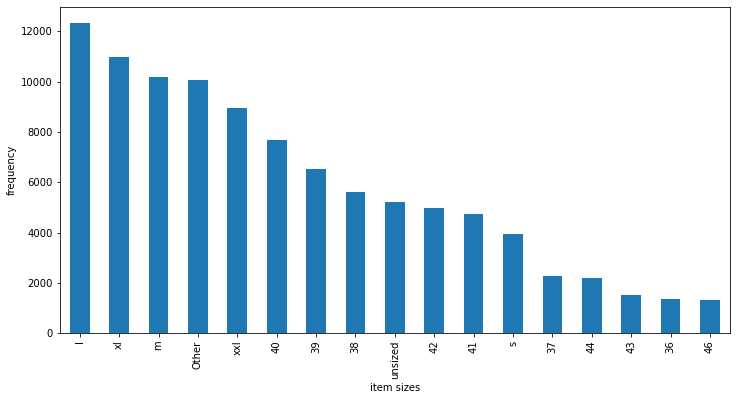

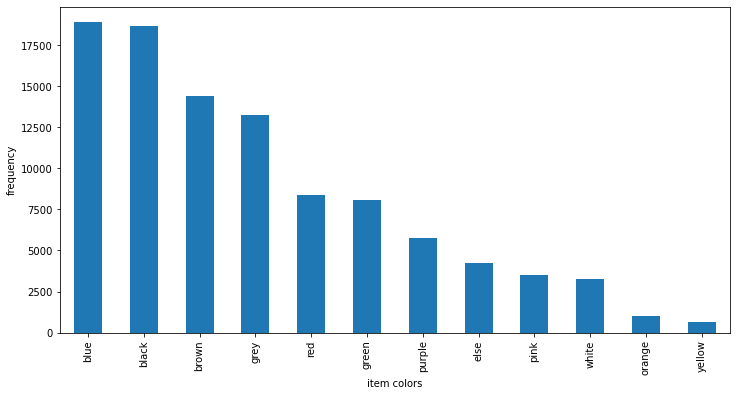

In [34]:
df['item_size'].value_counts().plot(kind='bar')
plt.xlabel("item sizes")
plt.ylabel("frequency")
plt.show()
df['item_color'].value_counts().plot(kind='bar')
plt.xlabel("item colors")
plt.ylabel("frequency")
plt.show()

<span style='font-family:"Times New Roman"'> <span styel=''> Item price is an important variable when it comes to online shopping. While the customer may base his final buying decision on the overall benefits offered by the product, he is likely to compare the price with the perceived value of the product to evaluate it That is why,to the variable "item_price" outlier truncation will be also applied.

In [35]:
num_cols = [x for x in df.columns if df[x].dtype == 'float16' ]  
df[num_cols] = df[num_cols].apply(outlier_truncation, axis=0, args=(3,))  


num_cols = [x for x in data_unknown.columns if data_unknown[x].dtype == 'float16' ]  
data_unknown[num_cols] = data_unknown[num_cols].apply(outlier_truncation, axis=0, args=(3,))  


<span style='font-family:"Times New Roman"'> <span styel=''> Now it is crucial to treat variables "order_item_id","brand_id","user_id". These variables are crucial if there is a need to define frequency of order and return rate of particular brand/item/customer. Then, the probability of the return for the particular brand/user/item will be counted.

In [36]:
df['Frequency for user']=df['user_id'].replace(df['user_id'].value_counts())
df['Frequency for brand']=df['brand_id'].replace(df['brand_id'].value_counts())

data_unknown['Frequency for user']=data_unknown['user_id'].replace(data_unknown['user_id'].value_counts())
data_unknown['Frequency for brand']=data_unknown['brand_id'].replace(data_unknown['brand_id'].value_counts())

df

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,user_reg_date,return,user_age,age_bins,days_delivery,order_month,Frequency for user,Frequency for brand
0,1,643,38,blue,30,49.906250,30822,Mrs,Saxony,2016-06-23,0,52,"(51, 63]",5.0,6,3,1272
1,2,337,Other,grey,30,19.953125,30822,Mrs,Saxony,2016-06-23,0,52,"(51, 63]",11.0,6,3,1272
2,3,270,xxl,grey,49,79.875000,30823,Mrs,Baden-Wuerttemberg,2015-03-15,1,51,"(50, 51]",5.0,6,17,1733
3,4,142,xxl,grey,49,99.875000,30823,Mrs,Baden-Wuerttemberg,2015-03-15,0,51,"(50, 51]",5.0,6,17,1733
4,5,561,xxl,grey,3,14.898438,30823,Mrs,Baden-Wuerttemberg,2015-03-15,1,51,"(50, 51]",5.0,6,17,11389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,156,Other,blue,34,29.906250,713,Mrs,Rhineland-Palatinate,2015-02-17,0,62,"(51, 63]",1.0,9,4,814
99996,99997,156,Other,brown,34,29.906250,713,Mrs,Rhineland-Palatinate,2015-02-17,0,62,"(51, 63]",1.0,9,4,814
99997,99998,1832,xxl,black,37,26.906250,47794,Mr,Hamburg,2016-09-10,0,36,"(31, 40]",2.0,9,3,4716
99998,99999,1832,xxl,black,37,26.906250,47794,Mr,Hamburg,2016-09-10,0,36,"(31, 40]",2.0,9,3,4716


In [37]:
df['Frequency for user']=df['user_id'].replace(df['user_id'].value_counts())
df['Frequency for brand']=df['brand_id'].replace(df['brand_id'].value_counts())
df['Frequency for item']=df['item_id'].replace(df['item_id'].value_counts())

df['return_brand'] = df.groupby('brand_id')['return'].transform('sum') 
df['return_user'] = df.groupby('user_id')['return'].transform('sum') 
df['return_item'] = df.groupby('item_id')['return'].transform('sum') 

df['brand_prob']=(df['return_brand']/df['Frequency for brand'])*100
df['item_prob']=(df['return_item']/df['Frequency for item'])*100
df['user_prob']=(df['return_user']/df['Frequency for user'])*100

df = df.drop('return_brand', axis = 1)
df = df.drop('return_item', axis = 1)
df = df.drop('return_user', axis = 1)
df = df.drop ('Frequency for brand', axis = 1)
df = df.drop ('Frequency for item', axis = 1)
df = df.drop ('Frequency for user', axis = 1)
df = df.drop ('order_item_id', axis = 1)

data_unknown = data_unknown.drop ('Frequency for brand', axis = 1)
data_unknown = data_unknown.drop ('Frequency for user', axis = 1)


<span style='font-family:"Times New Roman"'> <span styel=''> To choose which of the features to use in our model we should look to the correlation between the variables to see which one affect the most our target variable are the most relevant to build the model. Only correlation less than -0.30 and more than 0.30 is important.

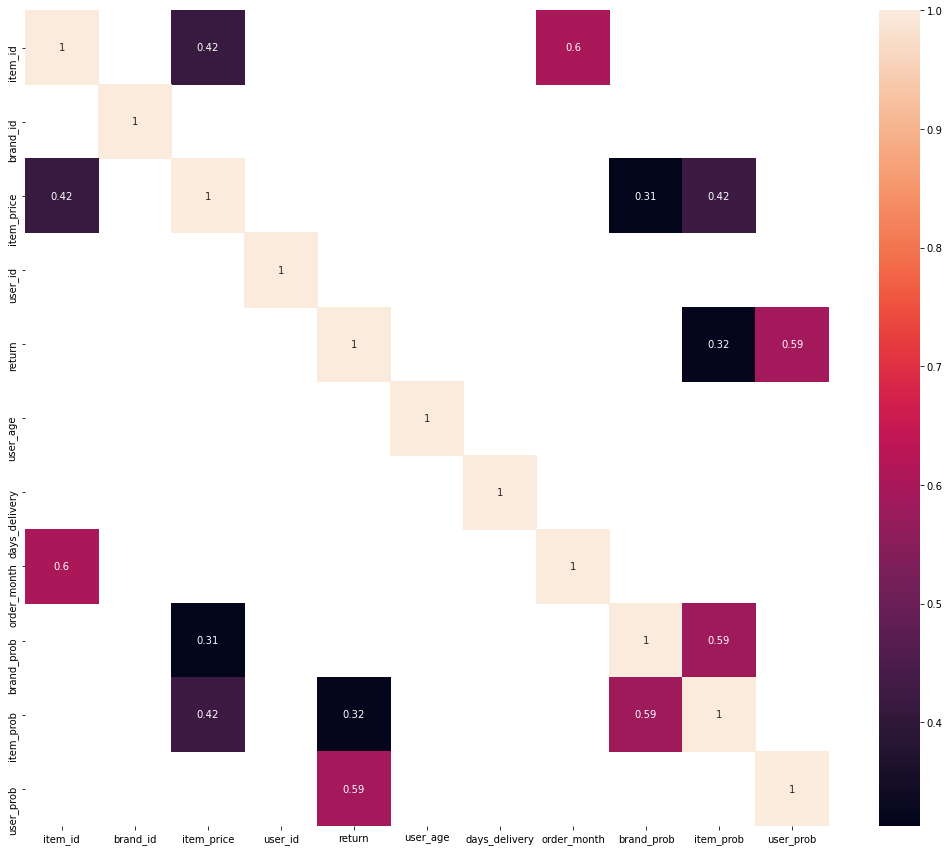

In [38]:
corr= df.corr()
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],
            annot=True);

<span style='font-family:"Times New Roman"'> <span styel=''> 
   Correlation map is a great tool to visualize which variables are correlated regarding to the target variable. These variables will be used for the model, so all other variables with low correlation can be dropped. 

In [39]:
df.drop('item_size', inplace=True, axis=1)
df.drop('item_color', inplace=True, axis=1)
df.drop('user_title', inplace=True, axis=1)
df.drop('user_state', inplace=True, axis=1)
df.drop('user_reg_date', inplace=True, axis=1)
df.drop('age_bins', inplace=True, axis=1)


data_unknown.drop('item_size', inplace=True, axis=1)
data_unknown.drop('item_color', inplace=True, axis=1)
data_unknown.drop('user_title', inplace=True, axis=1)
data_unknown.drop('user_state', inplace=True, axis=1)
data_unknown.drop('user_reg_date', inplace=True, axis=1)
data_unknown.drop('age_bins', inplace=True, axis=1)

## IV. Model tuning and selection 

### Model tuning

<span style='font-family:"Times New Roman"'> <span styel=''> To train model, training and validation sets should be created. Test size will be 30%. 

In [40]:
from sklearn.model_selection import train_test_split
X = df[["item_id","brand_id","item_price","user_id","user_age","days_delivery","order_month"]] 
y = df['return']
x_train, x_valid, y_train, y_valid = train_test_split(X, y,test_size=0.3)

<span style='font-family:"Times New Roman"'> <span styel=''> This assignment contains classification problem. The return variable contains binary and discrete value. So, the first model that will be used is a logistic regression which is easily implemented and trained. Still, it is difficult to capture complex relationships using logistic regression. That is why, it is not the only model that will be used.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


parameter_grid = {"C":[0.6, 0.7, 0.8, 0.9, 1]}
lr = GridSearchCV(LogisticRegression(), param_grid=parameter_grid,
                            n_jobs=-1)
lr.fit(x_train, y_train)


print(classification_report(y_valid, lr.predict(x_valid)))
print("The accuracy on the validation set is : {:.2f}".format(accuracy_score(y_valid, lr.predict(x_valid))))

              precision    recall  f1-score   support

           0       0.57      0.81      0.67     16175
           1       0.56      0.28      0.38     13825

    accuracy                           0.57     30000
   macro avg       0.56      0.55      0.52     30000
weighted avg       0.56      0.57      0.53     30000

The accuracy on the validation set is : 0.57


<span style='font-family:"Times New Roman"'> <span styel=''> From the course, we know that there are several metrics for the accuracy assessment such as threshold, probability and ranking metrics.Receiver Operating Characteristic (ROC) Curve is a helpful method to estimate the model fit. The ROC curve is created by evaluating the class probabilities for the model across a continuum of thresholds.  Closer it is to the optimal point of (0,1), the better the classifier is and the less it is mistaken.

Text(0, 0.5, 'true positive rate')

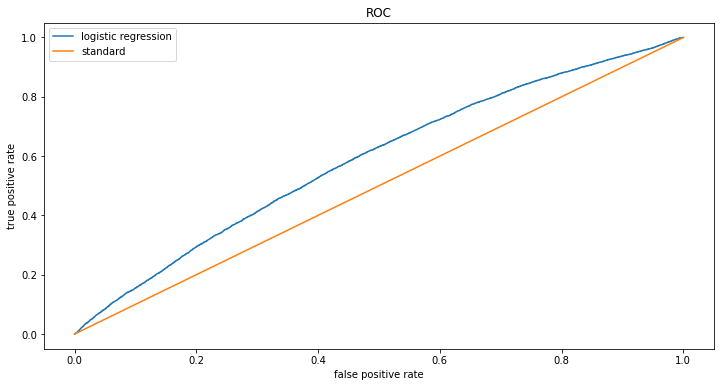

In [42]:
y_pred = lr.predict_proba(x_valid)
y_pred_up_prod = y_pred[:, 1]

y_true = (y_valid == 1).astype(int)

fpr_lr, tpr_lr, threshold = metrics.roc_curve(y_true, y_pred_up_prod)

plt.plot(fpr_lr, tpr_lr, label='logistic regression')
plt.plot((0, 1), (0, 1), label='standard')
plt.legend()
plt.title("ROC")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

<span style='font-family:"Times New Roman"'> <span styel=''> Regression model is an important component of the data analysis which is focussed on the estimation of the relation between a response variable and one or several explanatory variables (Hosmer, Lemeshow, 2000). Further steps are to create Lasso regression model and will see if it has higher accuraccy.

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss, roc_curve, confusion_matrix, mean_squared_error

parameter_grid = {"alpha":[1e-2, 3e-2, 1e-1, 3e-1, 1]}
lr_l1 = GridSearchCV(SGDClassifier(penalty='l1', loss='log'), 
                            param_grid=parameter_grid,
                            n_jobs=-1)
lr_l1.fit(x_train, y_train)


print(classification_report(y_valid, lr_l1.predict(x_valid)))
print("The accuracy on the validation set is : {:.2f}".format(accuracy_score(y_valid, lr_l1.predict(x_valid))))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67     16175
           1       0.56      0.24      0.34     13825

    accuracy                           0.56     30000
   macro avg       0.56      0.54      0.51     30000
weighted avg       0.56      0.56      0.52     30000

The accuracy on the validation set is : 0.56


<span style='font-family:"Times New Roman"'> <span styel=''>  Accuracy fell down for this model, and it makes no sense to continue implementing it. The next approach - random forest. Random forest often demonstrates a competitive performance by creating random samples of observations and growing decision trees based on them (Hatwell, Gaber and Azad, 2020). The random forests algorithm tries to decorrelate the trees so that they learn different things about the data. It does this by selecting a random subset of variables.(Yiu, 2021)

In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

parameter_grid = {"max_depth":[4, 8], "min_samples_leaf":[4,32,64]}
rf = RandomizedSearchCV(RandomForestClassifier(n_estimators=200), 
                            param_distributions=parameter_grid,
                            n_jobs=-1, cv=5)
rf.fit(x_train, y_train)


print(rf.best_params_)
print(classification_report(y_valid, rf.predict(x_valid)))
print("The accuracy on the validation set is : {:.2f}".format(accuracy_score(y_valid, rf.predict(x_valid))))
print("The loss on the validation set is : {:.2f}".format(log_loss(y_valid, rf.predict_proba(x_valid))))

{'min_samples_leaf': 4, 'max_depth': 8}
              precision    recall  f1-score   support

           0       0.62      0.74      0.67     16175
           1       0.60      0.46      0.52     13825

    accuracy                           0.61     30000
   macro avg       0.61      0.60      0.60     30000
weighted avg       0.61      0.61      0.60     30000

The accuracy on the validation set is : 0.61
The loss on the validation set is : 0.65


Text(0, 0.5, 'true positive rate')

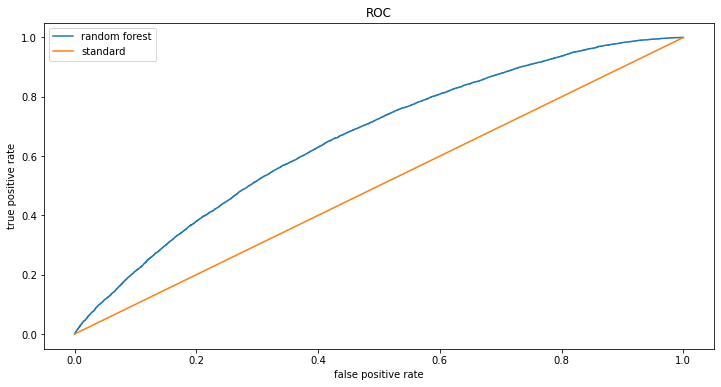

In [45]:
y_pred = rf.predict_proba(x_valid)
y_pred_up_prod = y_pred[:, 1]

y_true = (y_valid == 1).astype(int)

fpr_rf, tpr_rf, threshold = metrics.roc_curve(y_true, y_pred_up_prod)

plt.plot(fpr_rf, tpr_rf, label='random forest')
plt.plot((0, 1), (0, 1), label='standard')
plt.legend()
plt.title("ROC")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

<span style='font-family:"Times New Roman"'> <span styel=''> The accuracy of this model is higher than in the logistic model. Still,to find out if there is a way to minimize the loss of the model and to increase its accuracy, another approach will be used. It is extreme gradient booosting. Gradient boosting is a prediction model that uses an ensemble of decision trees similar to random forest. However, the decision trees are added sequentially, which is why these models are also called “Multiple Additive Regression Trees (MART)” (Friedman, Hastie and Tibshirani, 2000). Used xgboost function is still somehow different from the gradient boosting in its classical understanding. XGBoost uses the 2nd order derivative as an approximation and it uses more regularized model formalization against over-fitting.

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
#xgboost classifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
parameter_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgc = RandomizedSearchCV(xgb, param_distributions=parameter_grid, n_iter=5, scoring='roc_auc',
                                   n_jobs=4, verbose=3, random_state=1001 )

xgc.fit(x_train, y_train)


print(xgc.best_params_)
print(classification_report(y_valid, xgc.predict(x_valid)))
print("The accuracy on the validation set is : {:.2f}".format(accuracy_score(y_valid, xgc.predict(x_valid))))
print("The loss on the validation set is : {:.2f}".format(log_loss(y_valid, xgc.predict_proba(x_valid))))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:58:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:58:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       0.64      0.71      0.67     16175
           1       0.61      0.53      0.57     13825

    accuracy                           

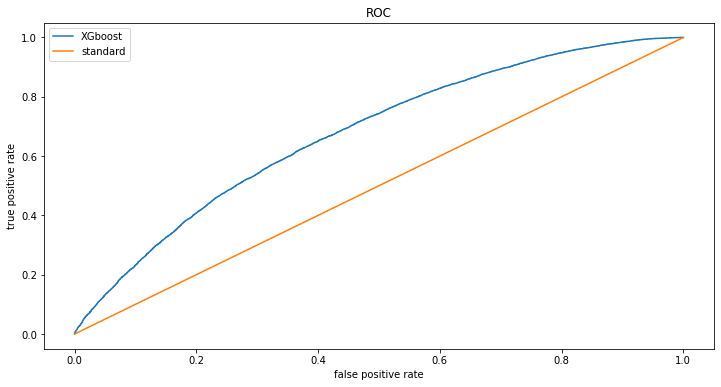

In [48]:
y_pred = xgc.predict_proba(x_valid)
y_pred_up_prod = y_pred[:, 1]

y_true = (y_valid == 1).astype(int)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_true, y_pred_up_prod)

plt.plot(fpr_xgb, tpr_xgb, label='XGboost')
plt.plot((0, 1), (0, 1), label='standard')
plt.legend()
plt.title("ROC")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate");

<span style='font-family:"Times New Roman"'> <span styel=''>  The extreme gradient boosting showed the best results with the highest accuracy of 63%. Loss slightly and insignificantly decreased comparing to the random forest model. The next step - to compare used models and to make final decision.

### Model selection

<span style='font-family:"Times New Roman"'> <span styel=''> Several models were analysed. All, except Lasso regression, had quite high accuracy. On this step, we will build a ROC curve for 3 models and will see which one brings us the best result.

Text(0, 0.5, 'true positive rate')

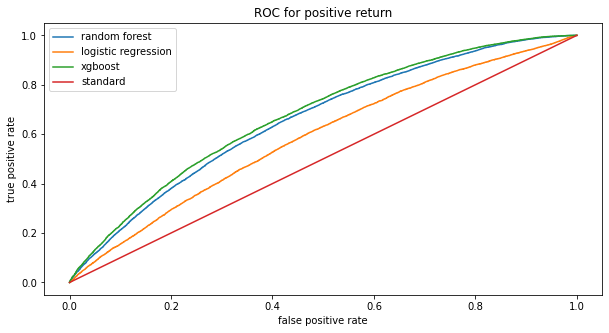

In [49]:
plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, label='random forest ')
plt.plot(fpr_lr, tpr_lr, label='logistic regression')
plt.plot(fpr_xgb, tpr_xgb, label='xgboost')

plt.plot((0, 1), (0, 1), label='standard')
plt.legend()
plt.title("ROC for positive return")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

<span style='font-family:"Times New Roman"'> <span styel=''> It was written above but it is worth repeating. The closer the ROC curve get to the top left corner, the better the test is overall. The closer the curve comes to the center diagonal line, the worse the test. XGBoost is a green line that is the closest to the left corner. That's why, this model was chosen for the further prediction. 


### V. Model evaluation

<span style='font-family:"Times New Roman"'> <span styel=''> The unknown data set was used and treated with the same preparation approaches earlier. At the end, we have this file.

In [50]:
data_unknown.head()

,order_item_id,item_id,brand_id,item_price,user_id,user_age,days_delivery,order_month
0,100001,1591,9,69.87500,56943,53,22.0,10
1,100002,1589,11,69.87500,56943,53,22.0,10
2,100003,1589,11,69.87500,56943,53,22.0,10
3,100004,1776,41,49.90625,56943,53,22.0,10
4,100005,2140,102,59.90625,56943,53,22.0,10


 By making the prediction, we use the data se and let's make the prediction on the unknown data. For this unknown variables will be used.

In [51]:
y_pred = rf.predict_proba(data_unknown[['item_id','brand_id','item_price','user_id','user_age','days_delivery','order_month']])
y_pred_up_prod = y_pred[:, 1]

In [52]:
from IPython.display import FileLink
# Import a module to delete the file
import os
def csv_download(df, csv_file_name, delete_prompt=True):
    df.to_csv(csv_file_name, index=False)
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Here is the file.')
        os.remove(csv_file_name)

In [ ]:
import csv
import os
print (os.getcwd())
file_1 = "example_prediction.csv"
submission = pd.read_csv(file_1)
submission.head()
submission['return']=y_pred_up_prod
submission_proba=submission

submission['return']=submission['return'].apply(lambda x: "0" if x < 0.47 else "1")
csv_download(submission, '612933_prediction.csv')

/Users/sofyakonchakova/Desktop/Jupyter notebooks for tutorials and execises-20210402


/Users/sofyakonchakova/Desktop/Jupyter notebooks for tutorials and execises-20210402/612933_prediction.csv

## <span style='font-family:"Times New Roman"'> <span styel=''> References
<span style='font-family:"Times New Roman"'> <span styel=''> 1. Abdallah, Z. and Webb, G., 2017. Data Preparation. Encyclopedia of Machine Learning and Data Mining.

<span style='font-family:"Times New Roman"'> <span styel=''> 2. Aismartz.com. 2019. Why EDA is Crucial for Any Data Science Project? AISmartz. [online] Available at: <https://www.aismartz.com/blog/why-eda-is-crucial-for-any-data-science-project/> [Accessed 5 March 2021].

<span style='font-family:"Times New Roman"'> <span styel=''> 3. Ben-Zvi, D., Garfield, J. and Ben-Zvi, D., 2004. The Challenge of Developing Statistical Literacy, Reasoning And Thinking. 1st ed. Springer Netherlands, pp.121-145.

<span style='font-family:"Times New Roman"'> <span styel=''> 4. Friedman, J., Hastie, T. and Tibshirani, R., 2000. Additive logistic regression: a statistical view of boosting (With discussion and a rejoinder by the authors). The Annals of Statistics, 28(2).

<span style='font-family:"Times New Roman"'> <span styel=''> 5. Hatwell, J., Gaber, M. and Azad, R., 2020. CHIRPS: Explaining random forest classification. Artificial Intelligence Review, 53(8), pp.5747-5788.

<span style='font-family:"Times New Roman"'> <span styel=''> 6. Jeevan, M., 2015. 30 tweetable quotes about Data Science. [online] Big Data Made Simple. Available at: <https://bigdata-madesimple.com/30-tweetable-quotes-data-science/> [Accessed 7 April 2021].

<span style='font-family:"Times New Roman"'> <span styel=''> 7. Yiu, T., 2021. Understanding Random Forest. [online] Medium. Available at: <https://towardsdatascience.com/understanding-random-forest-58381e0602d2> [Accessed 16 April 2021].